# Import data

In [1]:
import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

D:\KaggleLearningEquality2023Env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import random
lc = random.randint(0, len(data.topics)-10)
display(data.topics.iloc[lc:lc+8])
display(data.topics_translate.iloc[lc:lc+8])

,title,description,channel,category,level,language,parent,has_content
id,,,,,,,,
t_0b7645bf6979,Danny O'Neill - President of The Roasterie,"Danny O’Neill, President of The Roasterie, des...",2ee29d,aligned,4,en,t_bbc91072dcea,True
t_0b764c16d623,Les angles d'un polygone,Les propriétés des angles - intérieurs ou exté...,c152d6,source,4,fr,t_74acfb50e4dc,True
t_0b78af73fd33,Right triangles & trigonometry,Triangles are not always right (although they ...,0c929f,source,3,sw,t_b398e33b23cc,False
t_0b7988ad21b8,15. Materials we Use,NaN,760ea6,supplemental,2,en,t_4c5cbfe9ce46,False
t_0b7998d9b05f,Triangles,NaN,2ee29d,aligned,3,en,t_c9d0d220ed09,False
t_0b79b114bb0d,Sistemas conjugados e reações pericíclicas,Moléculas com conjugação podem sofrer algumas ...,8e286a,source,3,pt,t_ffdfd53288a4,False
t_0b79d14ef44c,Problemas com funções e equações lineares,Resolva vários problemas que envolvem relações...,8e286a,source,3,pt,t_687526a622c8,False
t_0b7ac17166e5,Divisores e múltiplos,Entender e encontrar divisores e múltiplos. De...,f9b74f,source,3,pt,t_2f7f59ec2707,False


,title,description,channel,category,level,language,parent,has_content,title_translate,description_translate
id,,,,,,,,,,
t_0b7645bf6979,Danny O'Neill - President of The Roasterie,"Danny O’Neill, President of The Roasterie, des...",2ee29d,aligned,4,en,t_bbc91072dcea,True,Danny O'Neill - President of The Roasterie,"Danny O’Neill, President of The Roasterie, des..."
t_0b764c16d623,Les angles d'un polygone,Les propriétés des angles - intérieurs ou exté...,c152d6,source,4,fr,t_74acfb50e4dc,True,The angles of a polygon,The properties of the angles - inside or outsi...
t_0b78af73fd33,Right triangles & trigonometry,Triangles are not always right (although they ...,0c929f,source,3,sw,t_b398e33b23cc,False,NaN,NaN
t_0b7988ad21b8,15. Materials we Use,NaN,760ea6,supplemental,2,en,t_4c5cbfe9ce46,False,15. Materials we Use,NaN
t_0b7998d9b05f,Triangles,NaN,2ee29d,aligned,3,en,t_c9d0d220ed09,False,Triangles,NaN
t_0b79b114bb0d,Sistemas conjugados e reações pericíclicas,Moléculas com conjugação podem sofrer algumas ...,8e286a,source,3,pt,t_ffdfd53288a4,False,Conjugated systems and pericyclic reactions,Molecules with conjugation can suffer some int...
t_0b79d14ef44c,Problemas com funções e equações lineares,Resolva vários problemas que envolvem relações...,8e286a,source,3,pt,t_687526a622c8,False,Problems with linear functions and equations,Solve several problems that involve real-world...
t_0b7ac17166e5,Divisores e múltiplos,Entender e encontrar divisores e múltiplos. De...,f9b74f,source,3,pt,t_2f7f59ec2707,False,Splitters and multiples,Understand and find splitters and multiples. A...


# Display topics data

In [2]:
display(data.topics)
display(data.correlations)
display(data.contents)

,title,description,channel,category,level,language,parent,has_content
id,,,,,,,,
t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True
...,...,...,...,...,...,...,...,...
t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False
t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True
t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True


,content_ids
topic_id,
t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
t_00069b63a70a,c_11a1dc0bfb99
t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...
t_fff830472691,c_61fb63326e5d c_8f224e321c87
t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5


,title,description,kind,text,language,copyright_holder,license
id,,,,,,,
c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA
...,...,...,...,...,...,...,...
c_fffcbdd4de8b,2. 12: Diffusion,NaN,html5,What will eventually happen to these dyes?\n\n...,en,CSU and Merlot,CC BY-NC-SA
c_fffe15a2d069,Sommare facendo gruppi da 10,Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n,video,NaN,it,NaN,NaN
c_fffed7b0d13a,Introdução à subtração,Sal fala sobre o que significa subtrair. Os ex...,video,NaN,pt,NaN,NaN


# Tree structure

In [3]:
import IPython.display

# see whether each tree has a unique root node

display(IPython.display.Markdown("**List of trees**"))
display(data.topics["channel"].value_counts())
display(IPython.display.Markdown("**List of root nodes**"))

topics_with_no_parent = data.topics.loc[data.topics["parent"].isnull()]
display(topics_with_no_parent["channel"].value_counts())
topic_trees = list(data.topics["channel"].value_counts().index)

**List of trees**

fef095    5770
0ec697    5355
6e90a7    4554
2ee29d    4438
36a98b    3667
          ... 
af86ca       6
5a410f       6
5864bf       6
8ca895       3
8dd5f3       1
Name: channel, Length: 171, dtype: int64

**List of root nodes**

ef2088    1
cf94d5    1
ebc86c    1
36068f    1
b3f329    1
         ..
983e56    1
02be07    1
23f9e1    1
da1fa7    1
28ffa8    1
Name: channel, Length: 171, dtype: int64

There is a unique root node for each topic.

In [4]:
# see whether there level corresponds to the DFS level
topics_id = data.topics.reset_index(level=0)
mg = topics_id.merge(topics_id, how = "left", left_on = "parent", right_on = "id")
display(mg)
not_equal = (mg["level_x"] - mg["level_y"]) != 1
print(not_equal.sum())

,id_x,title_x,description_x,channel_x,category_x,level_x,language_x,parent_x,has_content_x,id_y,title_y,description_y,channel_y,category_y,level_y,language_y,parent_y,has_content_y
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,t_16e29365b50d,Открития и проекти,Преоткрийте най-важните научни наблюдения в хо...,000cf7,source,3.0,bg,t_c85886762db7,False
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False,t_aa32fb6252dc,Junior High Level 3,NaN,b3f329,aligned,1.0,en,t_a7bda143557e,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,t_d14b6c2a2b70,Álgebra: funções,Nessa unidade temática vamos trabalhar com fun...,8e286a,source,3.0,pt,t_461c9a8dd863,False
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,t_4054df11a74e,Flow Charts: Logical Thinking?,This lesson is focused on flow charts. It supp...,6e3ba4,source,2.0,en,t_acbbd893e6af,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,t_e2452e21d252,Показателни и логаритмични функции,Тази тема покрива:\n\n- Корени и рационални ст...,000cf7,source,3.0,bg,t_5f4cc8e02423,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76967,t_fffb0bf2801d,4.3 Graph of functions,NaN,e77b55,aligned,4,en,t_676e6a1a4dc7,False,t_676e6a1a4dc7,Unit 4 - Relations and Functions,NaN,e77b55,aligned,3.0,en,t_30d005327467,True
76968,t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,t_50145b9bab3f,Miduara,"In this chapter, we will learn about circles, ...",0c929f,source,3.0,sw,t_c520677cef1d,False
76969,t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True,t_d448c707984d,Unidad 4,NaN,6e90a7,aligned,5.0,es,t_8c734f803ed6,True
76970,t_fffe811a6da9,تحديد العلاقة بين الإحداثيّات القطبية والإحداث...,5b9e5ca86571f90499ea987f,9fd860,source,2,ar,t_5b4f3ba4eb7d,True,t_5b4f3ba4eb7d,الهندسة وعلم المثلثات,5a608819f3a50d049abf68ea,9fd860,source,1.0,ar,t_ed0fb96f82d9,False


171


The level indeed indicates the level of the DFS starting from the root. It is therefore easy to create the tree structure using the level attribute.

# Null values

In [5]:
display(data.topics.isnull().sum())

title              2
description    42019
channel            0
category           0
level              0
language           0
parent           171
has_content        0
dtype: int64

# Information on trees

In [6]:
import IPython.display
# See whether each tree has the same language.
display(IPython.display.Markdown("***Multiple languages:***"))
for name, group in data.topics.groupby("channel")["language"]:
    languages = group.value_counts()
    if len(languages) > 1:
        display(IPython.display.Markdown("**{}**".format(name)))
        display(languages)

***Multiple languages:***

**217993**

hi     273
mr     250
gu     105
kn      98
bn      94
te      93
as      66
ur      66
ta      60
or      58
pnb     51
en      46
mul      1
Name: language, dtype: int64

**38a3e2**

ar    38
en    24
Name: language, dtype: int64

**4d2d4a**

hi     204
en     136
as      21
kn      21
bn      20
or      12
mul      1
Name: language, dtype: int64

**5139e9**

ar    1401
en       1
Name: language, dtype: int64

**6e90a7**

es    4495
en      59
Name: language, dtype: int64

**8260fc**

swa    35
en     24
mul     1
Name: language, dtype: int64

**9a51b0**

hi    5
en    1
Name: language, dtype: int64

**9dd9a7**

my     4
en     4
mul    1
Name: language, dtype: int64

**bbce73**

ar    88
en     3
Name: language, dtype: int64

**c8450a**

as    80
en     4
Name: language, dtype: int64

Seems like there are trees with different languages.

# See if all leaf nodes of trees are same level

In [7]:
import IPython.display
def dfs_find_leaves(node, mlist):
    child_count = len(node.children)
    if child_count == 0:
        mlist.append((node.title, node.level))
    else:
        for child in node.children:
            dfs_find_leaves(child, mlist)

for channel in data.topic_trees_id_list:
    root_node = data.topic_trees[channel]
    mlist = []
    dfs_find_leaves(root_node, mlist)
    level = mlist[0]
    all_equal = True
    problem = None
    for lv in mlist:
        if lv[1] != level[1]:
            all_equal = False
            problem = lv
            break
    if not all_equal:
        display(IPython.display.Markdown("**{}**".format(channel)))
        print(level, "    ", problem)

**fef095**

('The Pattern CVC#', 4)      ('Using the Basic Operator Symbols and Parentheses', 6)


**0ec697**

('Depreciation and amortization', 4)      ('Lesson 3: Exploring circumference', 5)


**6e90a7**

('Lección 3', 6)      ('Lenguaje y Pensamiento Critico', 5)


**36a98b**

('Construir modelos lineales para relaciones del mundo real', 4)      ('Sistema digestivo humano: órganos y fisiología de la digestión en el ser humano', 5)


**8e286a**

('A elasticidade dos preços', 4)      ('Sistema de Cuidados Médicos', 3)


**0c929f**

('The postwar era, 1945-1950', 4)      ('Geometric Measurement and Relationships', 3)


**ef2088**

('Linear Equations in One Variable', 5)      ('New Questions and Ideas', 4)


**410920**

('Lección 2', 4)      ('Dominio 12: luchando por una causa', 3)


**5139e9**

('كلام مبرمجين', 4)      ('مثال عملي لإنشاء كلاس الكتاب - الجزء الثامن -عملي', 5)


**274269**

('Videos', 5)      ('Explore', 6)


**217993**

('ਮੌਜ-ਮਸਤੀ', 3)      ('ਅੰਗਰੇਜ਼ੀ ਬੋਲੋ', 4)


**88c9d6**

('Front Matter', 4)      ('1.7: People in the System', 5)


**ebc86c**

('5. DNA replication I: Enzymes and mechanism', 5)      ('Genetic Methods in Microorganisms', 6)


**14d190**

('J2.2.9.1 distinguish between Possessive and reflexive pronouns.', 5)      ('Unit 4: Verb Tense Forms (Past Perfect ,Past Perfect Continuous ,Simple Future)', 4)


**344113**

('Geometry Length and Area Properties', 4)      ('Percent problems', 5)


**c7ca13**

('7.2.1 Alkaline earth metals - Group 2 Electron arrangement, gradation in size of the atom, ion and trends in ionisation energy', 5)      ('7.1.2 Alkali metals Group 1 - Physical properties: appearance, melting point, boiling point, thermal and electrical conductivity -- Supplementary Resources', 6)


**7f116c**

('How the internet works', 6)      ('Irregular plural nouns: base plurals and irregular endings', 7)


**5223e0**

('જોડીયા સંબંધો [04-DM-01]', 4)      ('ધો-૮ વાંચન-ગણન-લેખન Topic', 2)


**1fb613**

('6 Prime numbers', 4)      ('9.1 Rational numbers', 5)


**760ea6**

('Explore', 5)      ('Assessments', 4)


**42e8ef**

('middleware', 5)      ('Markdown Links', 4)


**d2ac0e**

('Factoring a polynomial', 4)      ('Number systems', 3)


**f83dcf**

('运算顺序', 4)      ('Lab values and concentrations ', 3)


**6e3ba4**

('Transcripts', 3)      ('Transcripts', 4)


**8bbad6**

('Identifying Halves, Quarters, and Three Quarters', 4)      ('Numbers 0 to 120', 6)


**e77b55**

('7.1 Revision on logic', 4)      ('Introduction to derivatives', 5)


**54971d**

('03 Lección 22 Las cargas eléctricas', 5)      ('Introducción a la tabla periódica', 6)


**39979b**

('Introduction to Carbon - Basic', 5)      ('Social Health', 4)


**998df9**

('Sólidos geométricos', 5)      ('OA 11. Reconocer, describir, crear y continuar patrones', 3)


**b4897d**

('Introduction to Adjectives', 4)      ('Cumulative', 6)


**fc9105**

('npm-scripts', 2)      ('src', 4)


**bfc678**

('Première manuels', 2)      ('Pour prendre un bon départ', 4)


**4d2d4a**

('\n      ফলপ্রসূ অভ্যাস    ', 3)      ('\n      ফলপ্রসূ অভ্যাস    ', 4)


**383b8a**

('Inverse Functions', 4)      ('Inputs and Outputs of Functions', 3)


**50fe84**

('Geography Form 4', 3)      ('I.R.E. Form 2', 4)


**ef93f0**

('Videos', 4)      ('Air pollution - Cause, effect, the green house effect', 3)


**cf94d5**

('Supplemental Modules (Modern Physics)', 3)      ('Front Matter', 4)


**c6dab5**

('Curriculum', 1)      ('Iterative Process [07-IPP-02]', 4)


**484bd2**

('Sumar y restar fracciones con denominadores comunes', 3)      ('Problemas con sumas y restas.', 4)


**14cb7f**

('Ionic bonding', 3)      ('Measurement of Distance', 4)


**d5fb04**

('Percentage: another way of comparing quantities', 3)      ('Visualizing solid shapes', 2)


**a13d2e**

('التمثيل الرياضي للمعلومات', 3)      ('القوى والحركة', 4)


**05be9f**

('10.5.2.1 Calculate length and area using a given scale and vice versa.', 4)      ('11.4.2 Composite functions', 3)


**d4eeb3**

('Module 6 - Selfies & Self-Esteem', 2)      ('The writing process', 4)


**c88ff6**

("MYDev Facilitator's Manuals", 2)      ('Module 5_ Safety and Health at Work', 3)


**50083f**

('Numerical adjectives', 4)      ('Adverbs of Manner', 5)


**6b09a4**

('Complex conjugates and dividing complex numbers', 5)      ("Working with 'i'", 4)


**2293a4**

('Listen to and retell stories', 5)      ('Draw with Bush Baby', 6)


**36068f**

('পদার্থ বিজ্ঞান', 2)      ('অধ্যায় ৭: ব্যাবহারিক জ্যামিতি', 3)


**00a2b4**

('নিজে করি (১)', 4)      ('৬ষ্ঠ অধ্যায়: যোগ, বিয়োগ, গুন ও ভাগ সংক্রান্ত সমস্যা', 3)


**06fb18**

('4.- LA FUNCIÓN DE REPRODUCCIÓN', 3)      ('2.4.- APARATO CIRCULATORIO ANIMAL', 4)


**f65044**

('7 Persistiré hasta lograr lo que me propongo', 4)      ('Actividades y recursos', 5)


**5c4c46**

('7.3.a.iii Kuchora mistari sambamba', 4)      ('7.3.e Ukubwa wa miche', 3)


**4b0f81**

('Forming Questions', 3)      ('Verbs', 2)


**49ea7a**

('Stoichiometry', 3)      ('Calculating Molar Mass', 4)


**57e9d3**

('Trecho C2: Bacias Hidrográficas', 4)      ('Desvendando os Mistérios', 5)


**0f546a**

('8.5.2.1 Evaluate algebraic expressions.', 4)      ('8.5.4 Construction of formulae.', 3)


**0a9df7**

('Plants and Animals', 3)      ('Career And Occupation Skills (Supplemental)', 4)


**735876**

('Persuasive Writing', 3)      ('21st Century Skills', 2)


**8afc0b**

('Assessment', 1)      ('Revision on the set of rational Numbers Topic', 4)


**11171c**

('9.7.3 Observe permanent slides of mammalian skin', 4)      ('7.7 Additional Resources for Gaseous Exchange', 3)


**494cf2**

('9.1.0 State the unit of charge', 5)      ('5.2.2 Brownian motion', 4)


**179e73**

('4 Practicamos actividades físicas al ritmo de la música peruana para construir nuestra identidad nacional', 4)      ('Materiales adaptados', 5)


**d5963f**

('4. A descubrir lo elemental (144-191)', 3)      ('Volúmenes de prismas', 5)


**bae253**

('Principles for a Healthy Life', 1)      ('The reproductive system', 2)


**686d66**

('10.7.1.1 Carry out calculations that involve Shares, dividends and investment Bonds.', 4)      ('10.2.1 Indices', 3)


**c1d57e**

('Test', 3)      ('Os cinco sentidos', 2)


**23f9e1**

('Spheres', 3)      ('Intro to rates', 4)


**d30518**

('Exponent properties- part 2/3', 3)      ('Fractional Exponents', 4)


**71fd51**

('Cambios en la programación didáctica', 3)      ('TIC_PROFESIONAL - Las TIC al servicio de la educación', 2)


**b3f329**

('Objective 1.5.2 Solve problems on circumference of a circle', 3)      ('Precursor skills', 4)


**2765c6**

('Neuroscience', 3)      ('History', 2)


**abd7dc**

('Plate Heat Exchanger', 4)      ('Book: Distillation Science (Coleman)', 3)


**9d5527**

('B4.6.1.1 Read widely for pleasure, personal development and demonstrate independent reading and learning in the literary content areas', 3)      ('Sub-Strand 6: Using Adverbs', 2)


**c36745**

('Pedagogical Innovation Itinerary professional', 3)      ("TIC_PROFESSIONNEL – Les TIC au service de l'éducation", 2)


**956596**

('৮ম অধ্যায়: ভগ্নাংশ', 3)      ('সময়ের রূপান্তর', 4)


**02be07**

('গুণিতক', 4)      ('অধ্যায় ৮: গড়', 3)


**5d4a02**

('6.3.2 - Angles and Arcs Determined by Lines Intersecting Outside a Circle', 4)      ('6.2 - Special Quadrilaterals', 3)


**7db7f2**

('Decimals', 2)      ('Fraction practice: simulation', 3)


**00fda4**

('ﺎﻠﻔﻳﺰﻳﺍﺀ', 3)      ('صيغة المبالغة وصفة مشبهة', 4)


**998b74**

('Properties of Elements', 3)      ('Ions', 2)


**03de11**

('7.4.3 Importance of noble gases', 4)      ('11.3 Preparation and properties of carbon (IV) oxide (carbon dioxide)', 3)


**fc1d48**

('TEMA SEMANAS DEL 15 AL 28 DE MARZO', 6)      ('Tema Especifico', 7)


**c8450a**

('সপ্তম শ্ৰেণী/ Standard 7', 2)      ('পৰিৱেশ বিজ্ঞান/Environmental science', 1)


**75fbe2**

('Modeling grass with parabolas', 3)      ('Orientation', 2)


**239d8f**

('Modelo atómico actual', 6)      ('Tercer Periodo', 2)


**1843c5**

('Bird Structure', 2)      ('Plants', 1)


**8b5488**

('Perímetro', 3)      ('Polígonos', 2)


**cfc6dd**

('Area of trapezoids & composite figures', 3)      ('Multiplying matrices by scalars', 4)


**ca3996**

('Numeracy', 3)      ('Looking at Life', 4)


**f08256**

('Polygons', 4)      ('Present Perfect & Present Perfect Continuous', 5)


**d4c17c**

('Recursos', 2)      ('A Arte das Vendas Fundamentos de Venda', 1)


**fc72b4**

('Les activités du programme principal', 2)      ('Manuel de Formation', 1)


**b03884**

('Knowing One’s Heights and Weight', 3)      ('Training Manual', 1)


**983e56**

('1.1.0 Classify natural numbers as odd numbers', 4)      ('Prime numbers', 5)


**38a3e2**

('Unit 12', 3)      ('المهارات الأساسية في الحسابات الرياضية', 2)


**8299ce**

('可下載的資源', 2)      ('销售的艺术：销售的基本要素', 1)


**b14cf2**

('સૂચનોનો સમૂહ અમલમાં મૂકવો [02-DA-01]', 2)      ('અભ્યાસક્રમ (Curriculum)', 1)


**bda367**

('12.0 Length', 2)      ('Conversion of units', 3)


**cd1388**

(' DNA', 3)      ('Microorganisms', 2)


**64cbe8**

('Noción de fracción, partes de una fracción', 4)      ('Derechos Básicos de Aprendizaje - GRADO 3', 3)


**b632e3**

('तार्किक पहेली [02-PS-33]', 2)      ('पाठ्यक्रम', 1)


**1b97a4**

('Trecho D3: Modelos Visuais', 4)      ('Comparação entre números decimais', 5)


**064c49**

('Opportunities', 1)      ('Using Butter', 5)


**c3dc85**

('माहीती मांडणी व विश्लेषण [03-IP-01]', 2)      ('अभ्यासक्रम', 1)


**858f89**

('Resources- Unit 4', 3)      ('Forms of Energy', 4)


**f9db19**

('Problemas verbales de multiplicación y división', 3)      ('4.1 Numeros Naturales', 2)


**bb3a0c**

('Introduction to rational numbers', 3)      ('Cubes and cubes roots', 2)


**a2924d**

('Square Roots', 2)      ('Real Numbers', 1)


**9905b7**

('العلوم للصف الرابع الإبتدائي', 3)      ('الأحياء للصف الثالث الثانوي', 4)


**f41d17**

('10-13 años', 2)      ('13-14 años', 3)


**231e82**

('II Año', 4)      ('Propósito e importancia de la Educación', 5)


**4689b3**

('Java 101', 1)      ('ترتيب العمليات', 2)


**6465e0**

('Números de 0 a 120', 4)      ('Mediatrices', 3)


**b1e277**

('Documentos de profesorado', 2)      ('El correo electronico', 1)


**a91e32**

('Algebraic expressions', 3)      ('Sets Worksheets', 4)


**ed5f98**

('Motion', 2)      ('Earth Science', 1)


**edb272**

('Concepts', 2)      ('Biology', 1)


**cc360a**

('How to Give a Vaccine', 3)      ('Dyslipidemia', 2)


**16c07b**

('Word of the Day', 1)      ('English Sentences', 2)


**9dd9a7**

('2 - ၂၁ ရာစု စိတ်နေသဘောထားများနှင့် အလေ့အကျင့်များ', 3)      ('Videos', 2)


Not all trees have leaves all in the same level.

# See if all leaf nodes contain some content

In [8]:
import IPython.display

for channel in data.topic_trees_id_list:
    root_node = data.topic_trees[channel]
    result = root_node.search_preorder(lambda x: not x.has_content, at = "leaf")
    
    if result is not None:
        display(IPython.display.Markdown("**channel: {}   title: {}**".format(channel, root_node.title)))
        print(result[0], ",   ", result[1].title)

**channel: ef2088   title: CBSE**

61 ,    New Questions and Ideas


**channel: 274269   title: Maths G3 to G10**

35 ,    Assessments


**channel: 88c9d6   title: LibreTexts Engineering**

471 ,    1: Part I - Ecosystems and Humans


**channel: ebc86c   title: Libretext Open Educational Resource Library**

95 ,    2.5: Structures Outside the Cell Wall


**channel: 14d190   title: Ghana English Language Curriculum**

25 ,    Unit 4: Verb Tense Forms (Past Perfect ,Past Perfect Continuous ,Simple Future)


**channel: 344113   title: Secondary Education**

88 ,    Study design


**channel: c7ca13   title: Kolibri Library for Kenya**

18 ,    7.4.3 Importance of noble gases


**channel: 7f116c   title: SCHOOL-DEV**

393 ,    Rational numbers


**channel: 5223e0   title: DIGITAL EDUCATION WITH MEHUL**

21 ,    સંભાવના


**channel: 1fb613   title: Libretext Open Educational Resource Library**

110 ,    Chapter 1: Problem Solving Strategies


**channel: 760ea6   title: Science channel**

19 ,    Assessments


**channel: 42e8ef   title: Ganar - Habilidades para el Trabajo**

257 ,    Nuestro juego de mesa


**channel: d2ac0e   title: Rajasthan State Hindi Channel**

15 ,    Number systems


**channel: 8bbad6   title: Maharashtra State Class 3 to 9 (English)**

34 ,    KA resources


**channel: e77b55   title: Camara Education Ethiopia Secondary Science and Maths for the Deaf**

192 ,    4.3 Graph of functions


**channel: 54971d   title: Ciencias Naturales - Honduras**

60 ,    Lactancia materna


**channel: 39979b   title: BB-Science**

138 ,    Social Health


**channel: 998df9   title: Chile - 1° Básico a 2° Medio - Matemáticas**

31 ,    Representan cantidades de 0 a 20 de manera concreta y escriben el número representado.


**channel: b4897d   title: BB-English**

75 ,    Prepositions


**channel: fc9105   title: Laboratoria**

388 ,    Intro


**channel: bfc678   title: Math**

93 ,    Déplacements


**channel: 383b8a   title: College**

18 ,    Inputs and Outputs of Functions


**channel: ef93f0   title: Clone of Science remix channel**

7 ,    Air pollution - Cause, effect, the green house effect


**channel: cf94d5   title: LibreTexts Physics**

126 ,    Map: Cosmology (Knox)


**channel: 484bd2   title: PORTAL ESTUDIANTIL**

97 ,    N3: Multiplicación


**channel: 14cb7f   title: Zim**

60 ,    Measure of Area


**channel: d5fb04   title: Rajasthan State English Channel**

8 ,    Visualizing solid shapes


**channel: 05be9f   title: Camara Education ZamSTEM Maths Grade 8 to 12**

50 ,    11.4.2 Composite functions


**channel: d4eeb3   title: Level 6 (Grade 9)**

67 ,    Parts of speech: the adverb


**channel: 50083f   title: English Content**

126 ,    Syntax: subject-verb agreement


**channel: 6b09a4   title: Fiji Y10 Mathematics**

9 ,    Addition and Subtraction


**channel: 2293a4   title: Ubongo Kids (Malawi)**

22 ,    Talking about different sounds and stories


**channel: 36068f   title: আগামী**

2 ,    পদার্থ বিজ্ঞান


**channel: f65044   title: Aprendo en Casa - Primaria**

93 ,    7 Riqueza en la diversidad | Mi mundo y todo el mundo mejor


**channel: 5c4c46   title: Khan Academy Hisabati (Tanzania)**

5 ,    7.3.e Ukubwa wa miche


**channel: 4b0f81   title: English (Gr4-7)**

6 ,    Writing


**channel: 49ea7a   title: Chemistry**

26 ,    8. Extraction of Metals


**channel: 57e9d3   title: Universo do Conhecimento**

4 ,    Trecho C2: Bacias Hidrográficas


**channel: 0f546a   title: Camara Education ZamSTEM Maths Junior Secondary - Grade 8 and 9**

11 ,    8.5.4 Construction of formulae.


**channel: 0a9df7   title: Our World and Our People (Ghana)**

44 ,    Map Making and Landmarks


**channel: 8afc0b   title: Camara Education - Ethiopia**

1 ,    Assessment


**channel: 11171c   title: KICD Biology Curriculum (DRAFT)**

50 ,    1.4 Characteristics of living organisms


**channel: 494cf2   title: Camara Education St. Martin's Physics**

16 ,    5.2.2 Brownian motion


**channel: bae253   title: PF (English)**

1 ,    Principles for a Healthy Life


**channel: 686d66   title: Camara Education ZamSTEM Maths Senior Secondary - Grade 10, 11 and 12**

22 ,    10.2.1 Indices


**channel: c1d57e   title: PF (Português)**

117 ,    IN_PROFISSIONAL - Metodologias de ensino inovadoras


**channel: 23f9e1   title: F3 Math**

33 ,    Inputs and Outputs of Functions


**channel: d30518   title: F2 Math**

12 ,    Laws of Exponents


**channel: 71fd51   title: PF (Español)**

9 ,    TIC_PROFESIONAL - Las TIC al servicio de la educación


**channel: b3f329   title: Ghana JHS Curriculum (in progress)**

12 ,    Unit 1.4 Shape and Space


**channel: 9d5527   title: Basic 4 - English**

10 ,    Sub-Strand 6: Using Adverbs


**channel: c36745   title: PF (Français, langue française)**

4 ,    TIC_PROFESSIONNEL – Les TIC au service de l'éducation


**channel: 02be07   title: Exercise (KAB)**

20 ,    অধ্যায় ৮: গড়


**channel: 5d4a02   title: Camara Education Ethiopia Impact Maths**

14 ,    5.2 - The reciprocal Functions of the Basic Trigonometric Functions


**channel: 998b74   title: Chemistry CP**

22 ,    Ions


**channel: 03de11   title: KICD Chemistry Curriculum (DRAFT)**

21 ,    11.3 Preparation and properties of carbon (IV) oxide (carbon dioxide)


**channel: fc1d48   title: BLIBLIOTECA - EDUCACIÒN FISICA - GRADO PRIMERO A ONCE**

34 ,    Tema General


**channel: c8450a   title: Assam SEBA Curriculum (Assamese-Medium)**

4 ,    পৰিৱেশ বিজ্ঞান/Environmental science


**channel: 75fbe2   title: Computer Science**

25 ,    Orientation


**channel: 239d8f   title: BIBLIOTECA . QUIMINICA GRADO DECIMO A GRADO ONCE**

23 ,    Tema General


**channel: 1843c5   title: Form 3 Biology**

46 ,    Fish


**channel: 8b5488   title: Matemáticas grado segundo**

5 ,    Medición


**channel: cfc6dd   title: F4 Math**

65 ,    Simultaneous Equations word problems 2


**channel: f08256   title: Ghana Education Service (GES) Curriculum**

23 ,    Geometric Construction


**channel: 983e56   title: Camara Learning Studio Demo**

9 ,    1.1.0 Round of numbers to the nearest tens, hundreds, thousands, millions and billions,


**channel: cd1388   title: FuseSchool**

17 ,    Geometry and Measures 


**channel: 64cbe8   title: GRADO 3**

47 ,    Algoritmos de multiplicación


**channel: 064c49   title: Real Futures**

16 ,    Baking and Home-Made Desserts


**channel: bb3a0c   title: khan math 8**

26 ,    Cubes and cubes roots


**channel: a2924d   title: Form 2 Maths**

8 ,    Real Numbers


**channel: 231e82   title: Fundación Fab**

4 ,    II Año


Not all leaf nodes contain some content

# See if all the contents only appear in leaf nodes

In [11]:
import IPython.display

for channel in data.topic_trees_id_list:
    root_node = data.topic_trees[channel]
    result = root_node.search_preorder(lambda x: x.has_content, at = "nonleaf")
    
    if result is not None:
        display(IPython.display.Markdown("**channel: {}   title: {}**".format(channel, root_node.title)))
        print(result[0], ",   ", result[1].title)

**channel: 6e90a7   title: CREE**

2 ,    Educación Media


**channel: ef2088   title: CBSE**

1670 ,    Coordinating Conjunctions


**channel: 410920   title: EngageNY (es)**

2 ,    Módulo 5


**channel: 5139e9   title: وزارة التربية والتعليم الأردنية**

0 ,    وزارة التربية والتعليم الأردنية


**channel: 274269   title: Maths G3 to G10**

6 ,    Assessments


**channel: 217993   title: PraDigi**

7 ,    ਇੰਗਲਿਸ਼


**channel: 88c9d6   title: LibreTexts Engineering**

6 ,    1: Chapters


**channel: ebc86c   title: Libretext Open Educational Resource Library**

14 ,    1: Fundamental Properties of Genes


**channel: 9fd860   title: Edraak (العربيّة)**

2 ,    استقصاء الحاجة إلى مقاييس التشتّت وحساب هذه المقاييس وتوضيح المعلومات التي تقدّمها عن البيانات


**channel: 14d190   title: Ghana English Language Curriculum**

45 ,    J2.5.1.4 determine how stories are developed i.e. plot.


**channel: 344113   title: Secondary Education**

8 ,    Ratio and Proportion


**channel: c7ca13   title: Kolibri Library for Kenya**

0 ,    Kolibri Library for Kenya


**channel: 7f116c   title: SCHOOL-DEV**

4 ,    ICT JSS2


**channel: 5223e0   title: DIGITAL EDUCATION WITH MEHUL**

15 ,    ધો-૩ વાંચન-ગણન-લેખન Topic


**channel: 1fb613   title: Libretext Open Educational Resource Library**

12 ,    9 Rational numbers, Irrational Numbers, and Continued fractions


**channel: 760ea6   title: Science channel**

9 ,    Assessments


**channel: 42e8ef   title: Ganar - Habilidades para el Trabajo**

2 ,    Bootcamp @Laboratoria


**channel: d2ac0e   title: Rajasthan State Hindi Channel**

0 ,    Rajasthan State Hindi Channel


**channel: 6e3ba4   title: MIT Blossoms**

2 ,    An Introduction to the Physics of Sailing


**channel: 8bbad6   title: Maharashtra State Class 3 to 9 (English)**

16 ,    3 digit numbers


**channel: e77b55   title: Camara Education Ethiopia Secondary Science and Maths for the Deaf**

2 ,    Mathematics


**channel: 54971d   title: Ciencias Naturales - Honduras**

2 ,    9eno


**channel: 998df9   title: Chile - 1° Básico a 2° Medio - Matemáticas**

3 ,    OA 14. Identificar figuras 2D y 3D


**channel: b4897d   title: BB-English**

7 ,    Coordinating Conjunctions


**channel: fc9105   title: Laboratoria**

0 ,    Laboratoria


**channel: 4d2d4a   title: TESSIndia**

2 ,    বিদ্যালয়ের নেতৃত্ব


**channel: 383b8a   title: College**

217 ,    Quadratics Exercises 1


**channel: 50fe84   title: High School**

0 ,    High School


**channel: ef93f0   title: Clone of Science remix channel**

157 ,    Assessments


**channel: cf94d5   title: LibreTexts Physics**

4 ,    Book: Spiral Modern Physics (D'Alessandris)


**channel: 14cb7f   title: Zim**

254 ,    Transformation


**channel: 653433   title: Khan Academy - Standardized Test Preparation**

0 ,    Khan Academy - Standardized Test Preparation


**channel: d5fb04   title: Rajasthan State English Channel**

9 ,    Triangle and its properties


**channel: d4eeb3   title: Level 6 (Grade 9)**

18 ,    Summary


**channel: c88ff6   title: Alternative Learning System**

3 ,    Opportunity 2.0 Self-Directed Learning Modules


**channel: 50083f   title: English Content**

39 ,    Verbs


**channel: 2293a4   title: Ubongo Kids (Malawi)**

134 ,    Questions


**channel: 36068f   title: আগামী**

10 ,    অধ্যায় ৮: তথ্য ও উপাত্ত


**channel: 06fb18   title: Proyecto Biosfera**

2 ,    LAS FUNCIONES DE LOS SERES VIVOS


**channel: f65044   title: Aprendo en Casa - Primaria**

10 ,    Experiencia 6


**channel: 4b0f81   title: English (Gr4-7)**

1 ,    Gr 4 Spare Files


**channel: 49ea7a   title: Chemistry**

5 ,    Molar Mass


**channel: 57e9d3   title: Universo do Conhecimento**

17 ,    Trilha G: Água na Terra


**channel: 0f546a   title: Camara Education ZamSTEM Maths Junior Secondary - Grade 8 and 9**

1 ,    Grade 8


**channel: 0a9df7   title: Our World and Our People (Ghana)**

12 ,    Home and School


**channel: 8afc0b   title: Camara Education - Ethiopia**

2 ,    Math Grade 9


**channel: 11171c   title: KICD Biology Curriculum (DRAFT)**

1 ,    Form 2 Biology Curriculum


**channel: 494cf2   title: Camara Education St. Martin's Physics**

2 ,    Form 1


**channel: 179e73   title: Aprendo en Casa - Secundaria**

35 ,    5 Elaboramos prototipos que revaloren la diversidad cultural de nuestro entorno


**channel: d5963f   title: Cubo Educativo (Chile)**

2 ,    Química


**channel: bae253   title: PF (English)**

60 ,    Level Up


**channel: 686d66   title: Camara Education ZamSTEM Maths Senior Secondary - Grade 10, 11 and 12**

1 ,    Grade 10


**channel: d30518   title: F2 Math**

117 ,    52 Statistics 3


**channel: b3f329   title: Ghana JHS Curriculum (in progress)**

4 ,    Objective 1.5.1 Solve problems on perimeter of polygons


**channel: abd7dc   title: Libretext Open Educational Resource Library**

75 ,    9: Dimensional Analysis


**channel: 9d5527   title: Basic 4 - English**

2 ,    Sub-Strand 1: Building the Love and Culture of Reading


**channel: 956596   title: Videos (KAB)**

64 ,    অধ্যায় ৭: ব্যাবহারিক জ্যামিতি


**channel: 5d4a02   title: Camara Education Ethiopia Impact Maths**

1 ,    Grade 10


**channel: 7db7f2   title: Level 1 (Grade 4)**

10 ,    Multiple Operations and Grouping


**channel: 00fda4   title: Awael Educational Website (العربيّة)**

4 ,    اللغة العربية


**channel: 018d08   title: KICD Physics Curriculum (DRAFT)**

26 ,    8.0 Rectilinear propagation of light and reflection at a plane surface (16 lessons)


**channel: 03de11   title: KICD Chemistry Curriculum (DRAFT)**

26 ,    8.0 Structure and Bonding (20 lessons)


**channel: bbce73   title: ELD Teacher Professional Development Cources (العربيّة)**

37 ,    علم النفس التربوي


**channel: c8450a   title: Assam SEBA Curriculum (Assamese-Medium)**

15 ,    জ্যামিতি আৰু জোখ / Geometry and Measurement


**channel: 239d8f   title: BIBLIOTECA . QUIMINICA GRADO DECIMO A GRADO ONCE**

2 ,    Segundo Periodo


**channel: 8b5488   title: Matemáticas grado segundo**

1 ,    Pensamiento Espacial


**channel: cfc6dd   title: F4 Math**

13 ,    Invertible matrices


**channel: ca3996   title: TESSA - Teacher Resources**

40 ,    Handbooks and Toolkits for Teachers and Teacher Educators


**channel: d4c17c   title: HP LIFE - Cursos (Português)**

1 ,    Lucros e prejuízos


**channel: 983e56   title: Camara Learning Studio Demo**

1 ,    Form 1 Maths


**channel: 03f103   title: HP LIFE - कार्यक्रम (हिन्दी)**

1 ,    लाभ और हानि


**channel: 38a3e2   title: ELD King Khaled University Learning (العربيّة)**

14 ,    قواعد الإملاء العربي


**channel: 8299ce   title: HP LIFE - 课程 (中国大陆)**

1 ,    商务电子邮件


**channel: 32e583   title: HP LIFE - Cours (Français)**

1 ,    Leadership efficace


**channel: 0ea5f3   title: HP LIFE - Courses (English)**

1 ,    Selling online


**channel: f27bd5   title: HP LIFE - دورات ومسارات (العربية)**

1 ,    تعيين الموظفين


**channel: 27d43f   title: HP LIFE - Cursos (Español)**

1 ,    Administración del inventario


**channel: 64cbe8   title: GRADO 3**

5 ,    CONTENIDOS PARA MATEMÁTICAS GRADO 3


**channel: 1b97a4   title: Matemática - Preparando o Futuro**

3 ,    Trilha D: Porcentagens


**channel: 064c49   title: Real Futures**

34 ,    For educators and caregivers


**channel: 858f89   title: KPK - Class 6**

1 ,    General Science


**channel: f9db19   title: Matemáticas Quinto Grado (Guatemala)**

0 ,    Matemáticas Quinto Grado (Guatemala)


**channel: bae778   title: Form 4 Biology**

7 ,    Respiration


**channel: 6465e0   title: Matemáticas - 1° Básico a 6° Básico - Chile**

9 ,    Geometría


**channel: a91e32   title: Malawi Mathematics Syllabus**

0 ,    Malawi Mathematics Syllabus


**channel: cc360a   title: Medicine**

0 ,    Medicine


**channel: 9dd9a7   title: PointB 21CS Guide**

2 ,    21st Century Guide


Not all contents are in leaf nodes.

# See if all the contents are contained by some node

In [9]:
display(data.correlations)

,content_ids
topic_id,
t_00004da3a1b2,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
t_00068291e9a4,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
t_00069b63a70a,c_11a1dc0bfb99
t_0006d41a73a8,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
t_0008768bdee6,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...
t_fff830472691,c_61fb63326e5d c_8f224e321c87
t_fff9e5407d13,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
t_fffbe1d5d43c,c_46f852a49c08 c_6659207b25d5


In [10]:
mcontents = data.correlations["content_ids"].apply(lambda x: pd.Series(data = x.split())).stack().reset_index(drop = True)
mcontents.name = "id"
mcontents = pd.DataFrame(data = mcontents, index = mcontents.index)
mcontents["dummy"] = True
merged = data.contents.merge(mcontents, right_on = "id", left_on = "id", how = "left")
display(merged["dummy"].isnull().sum())

0

This creates a list of content_ids from the correlations data (mcontents). A left outer join is used to see if the data there are ids in data.contents which are not in the correlations file (mcontents). If such exists, there should be a null value in the dummy column in merge. So all contents are contained by some node.

# Systematically display the intersections of the contents of different trees

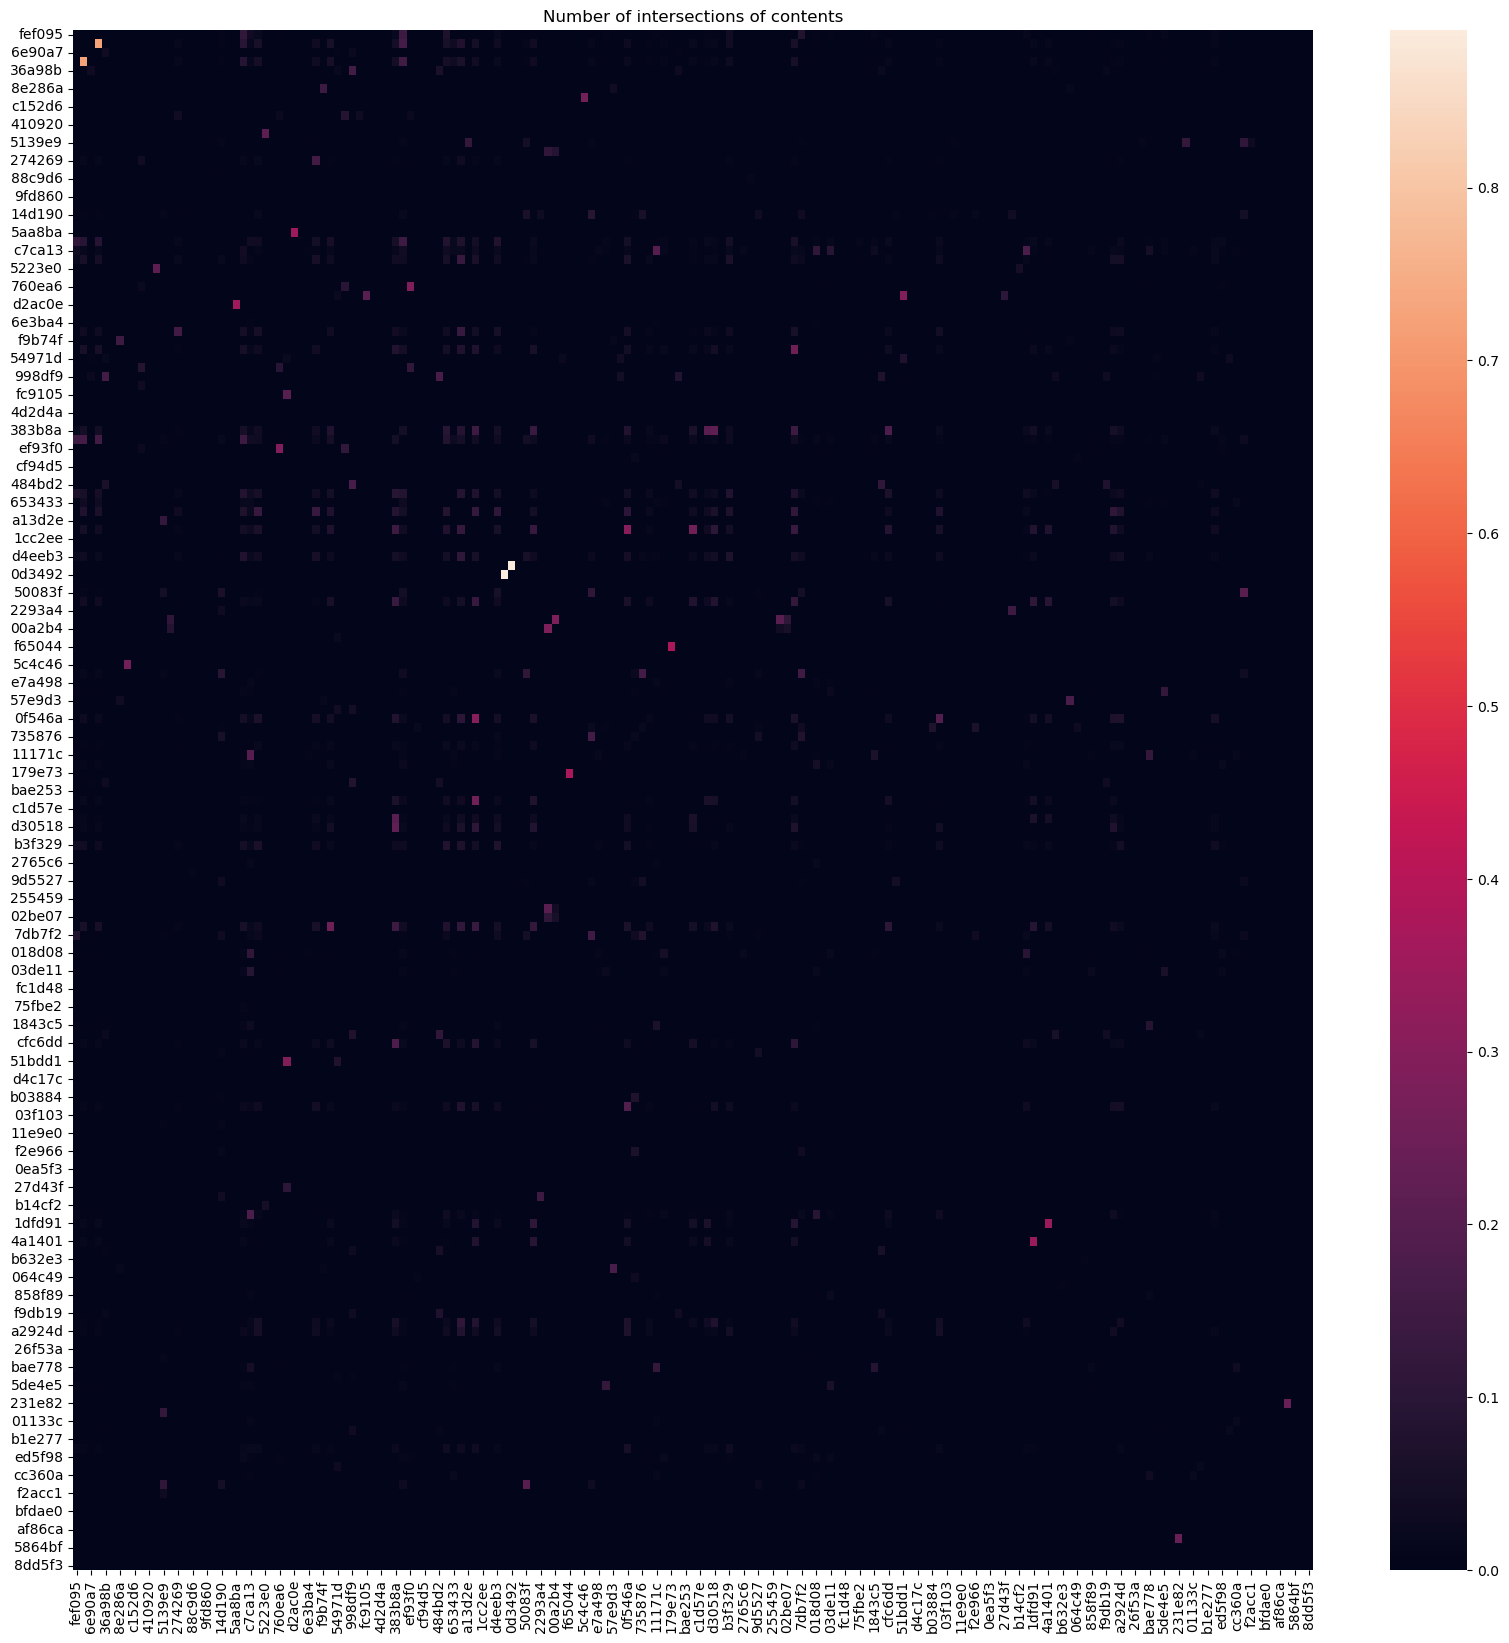

In [16]:
n = len(data.topic_trees_id_list) # number of topic channels (trees)
intersection_matrix = np.zeros(shape = (n, n)) # numpy n x n matrix of zeros
intersection_relative_matrix = np.zeros(shape = (n, n)) # to store the relative number of intersections

def find_number_intersections(i, j):
    channel_i = data.topic_trees_id_list[i]
    channel_j = data.topic_trees_id_list[j]
    intersection = set(data.topic_trees_contents[channel_i]).intersection(set(data.topic_trees_contents[channel_j]))
    union = set(data.topic_trees_contents[channel_i]).union(set(data.topic_trees_contents[channel_j]))
    return len(intersection), len(union)

# we only need to fill in matrix i not equal to j
for i in range(n):
    for j in range(i):
        no_intersections, no_union = find_number_intersections(i, j)
        intersection_matrix[j, i] = intersection_matrix[i, j] = no_intersections
        intersection_relative_matrix[j, i] = intersection_relative_matrix[i, j] = no_intersections / no_union

# now display it
intersect_data = pd.DataFrame(data = intersection_matrix, columns = data.topic_trees_id_list, index = data.topic_trees_id_list)
intersect_relative_data = pd.DataFrame(data = intersection_relative_matrix, columns = data.topic_trees_id_list, index = data.topic_trees_id_list)
plt.figure(figsize = (20, 20)) # plot with size
plt.title("Number of intersections of contents")
sns.heatmap(data = intersect_relative_data)
plt.show()

It appears that the intersection of the contents are quite sparse. Two different trees are likely to not have any intersections. It is useful to restrict our attention to trees that have intersection with some other tree. We manipulate the previous intersect_data dataframe.

# Restriction to a subset of the trees

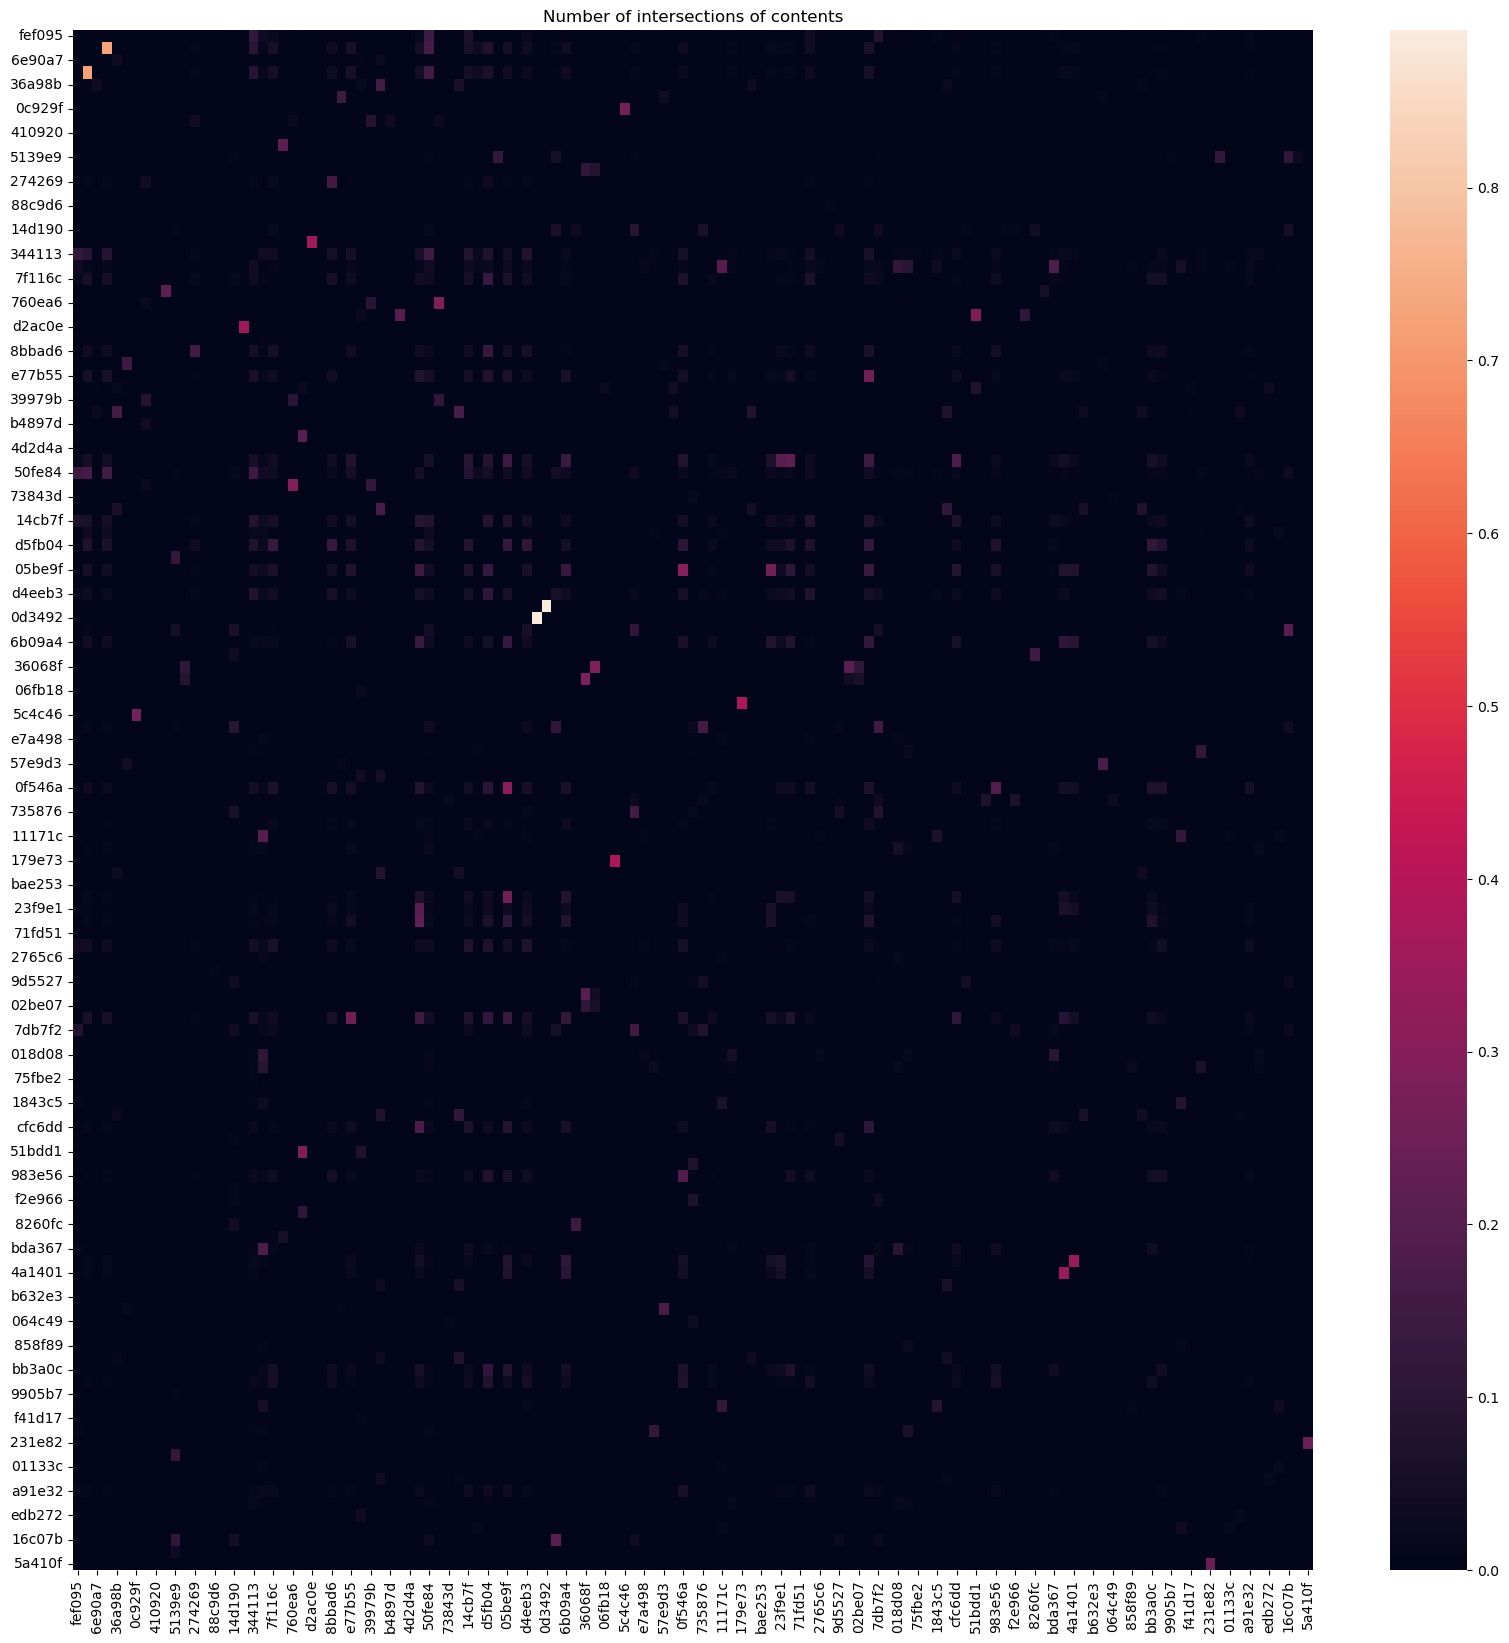

In [29]:
# obviously intersect_data is symmetric matrix. we find the list of trees which intersect with some other tree.
# list of number of intersections with other trees, indexed by the channel id
intersections_with_others = intersect_data.sum()
# obtain the list of trees satisfying that now
has_intersection_trees = list(intersections_with_others.loc[intersections_with_others > 0].index)
# project to submatrix, first do selection on rows, and do projection on columns
intersect_subdata = intersect_data.loc[intersect_data.index.isin(has_intersection_trees)][has_intersection_trees]
intersect_relative_subdata = intersect_relative_data.loc[intersect_relative_data.index.isin(has_intersection_trees)][has_intersection_trees]
plt.figure(figsize = (20, 20))
plt.title("Number of intersections of contents")
sns.heatmap(data = intersect_relative_subdata)
plt.show()

data is still sparse, we use graph connectivity to find the connected components of the content trees, where tree $T_1$ is connected to $T_2$ if and only if $\text{contents}(T_1) \cap \text{contents}(T_2) \neq \varnothing$

component:  ['fef095', '14d190', '0ec697', '2ee29d', '274269', 'ef2088', 'ebc86c', '760ea6', '217993', 'ef93f0', '344113', 'c7ca13', '7f116c', '8bbad6', 'e77b55', '39979b', 'b4897d', 'd4eeb3', '383b8a', '50fe84', '5139e9', '6e3ba4', '54971d', '6e90a7', '36a98b', '998df9', '410920', '42e8ef', 'fc9105', '8b5488', '484bd2', 'd5963f', '7385f9', '71fd51', '64cbe8', 'f41d17', '6465e0', '51bdd1', 'edb272', 'f9db19', '27d43f', '239d8f', '1cc2ee', '06fb18', '11171c', '653433', '14cb7f', '73843d', '05be9f', 'd5fb04', '6b09a4', '0f546a', '8afc0b', '686d66', '23f9e1', 'd30518', 'b3f329', '4d2d4a', '03de11', 'e7a498', '018d08', '49ea7a', '0a9df7', '4b0f81', '50083f', '9d5527', '735876', '7db7f2', '494cf2', 'bda367', '5d4a02', 'cfc6dd', '75fbe2', 'a2924d', '983e56', 'bb3a0c', 'a91e32', '1dfd91', '4a1401', 'ed5f98', 'f2e966', '16c07b', 'ca3996', '858f89', 'bae253', '5de4e5', '1843c5', 'bae778', 'cc360a', '01133c', 'b03884', '064c49', '2765c6', 'a13d2e', '00fda4', '9905b7', '38a3e2', '4689b3', 'f2acc1

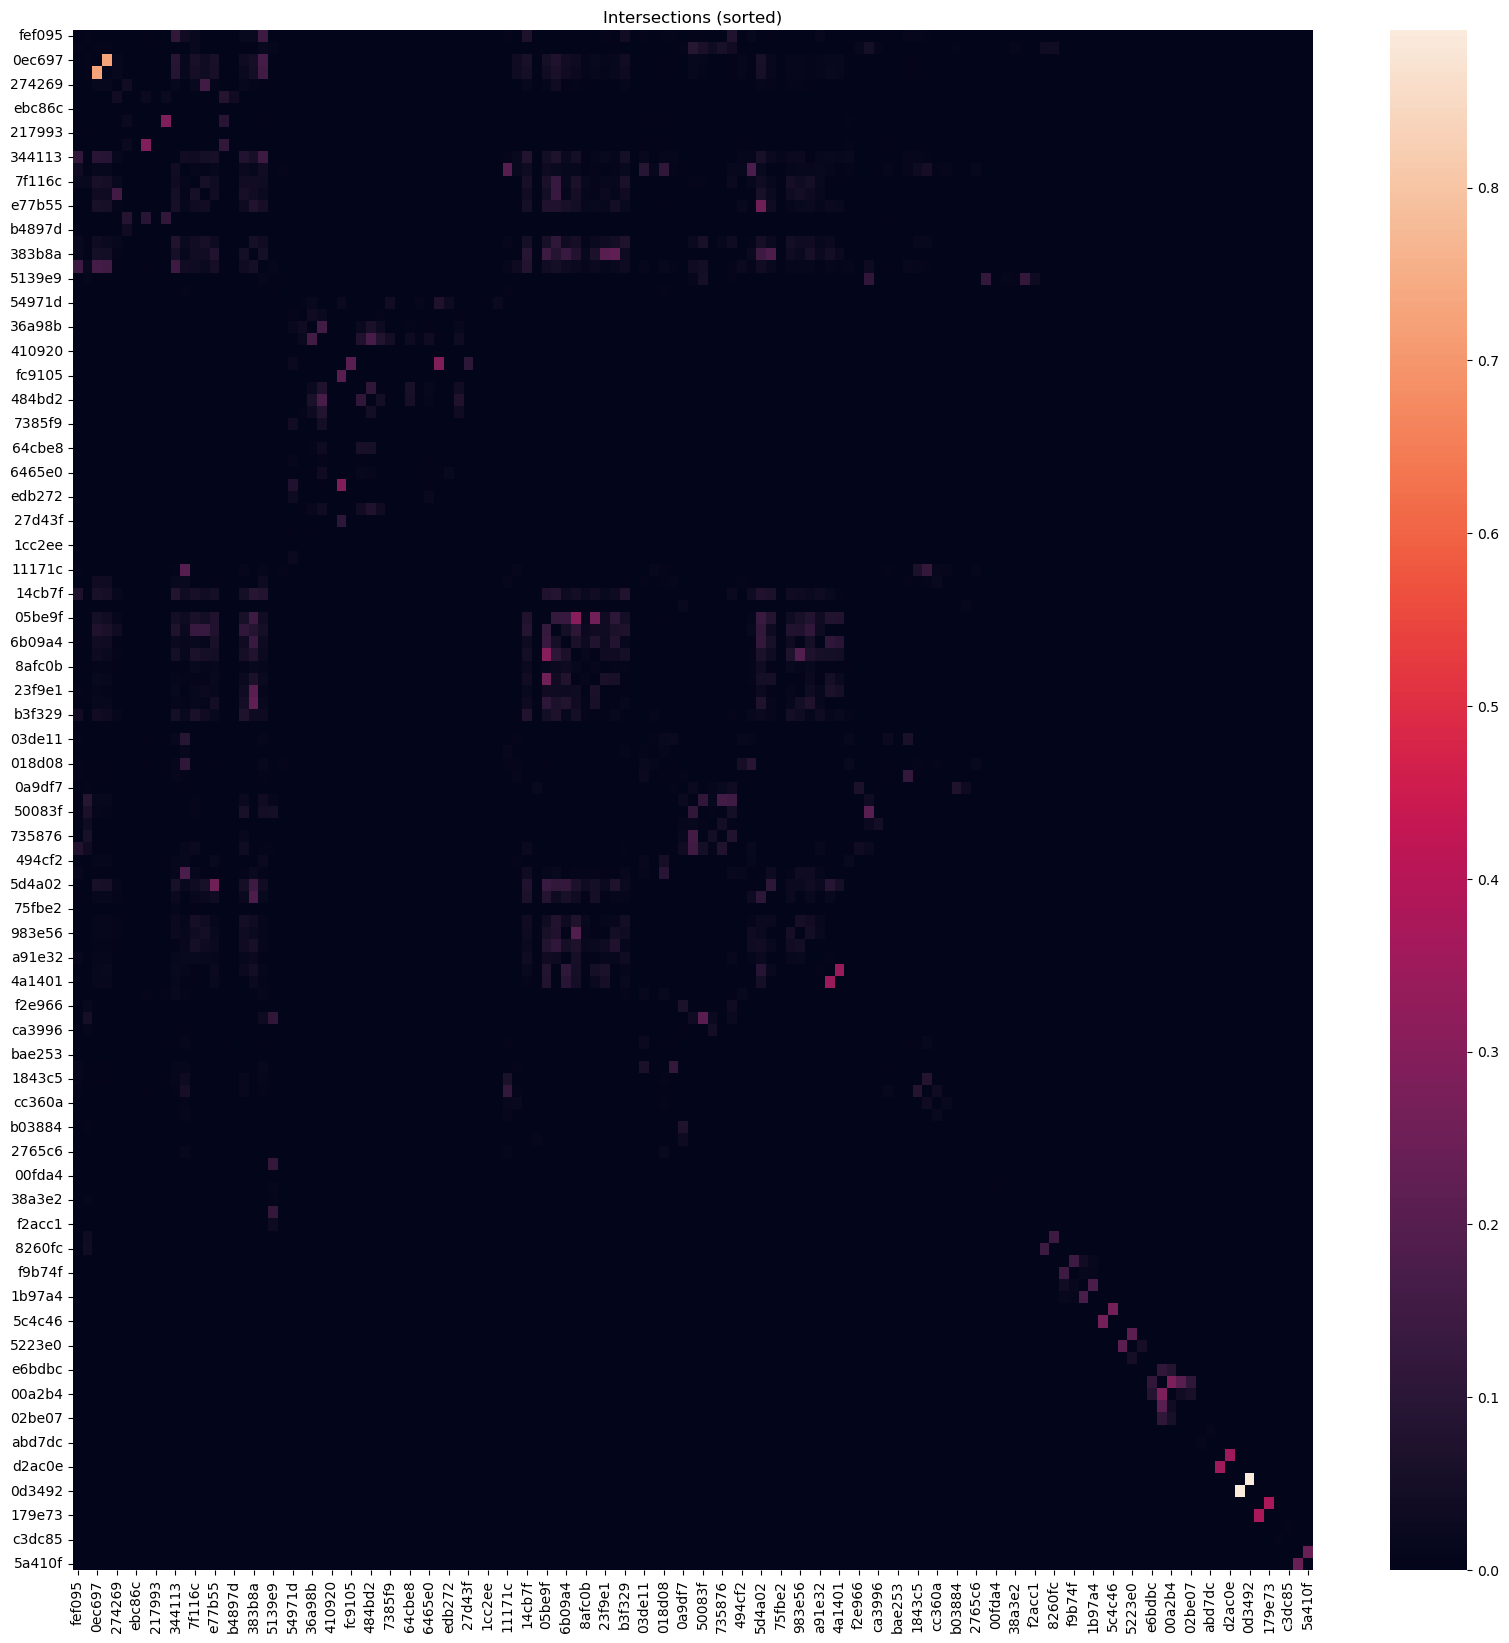

In [39]:
graph_components = []
visited_trees = []

def dfs_traverse(channel, cluster_idx):
    # visit this node and add it to the graph
    visited_trees.append(channel)
    graph_components[cluster_idx].append(channel)
    
    # visit unvisited neighbors
    neighbors = list(intersect_subdata.loc[intersect_subdata[channel] > 0].index)
    for channel_neighbor in neighbors:
        if channel_neighbor not in visited_trees:
            dfs_traverse(channel_neighbor, cluster_idx)
            
cidx = 0
for channel in has_intersection_trees:
    if channel not in visited_trees:
        graph_components.append([])
        dfs_traverse(channel, cidx)
        cidx += 1

total_channels = []
for component in graph_components:
    print("component: ",component)
    for channel in component:
        total_channels.append(channel)

intersect_relative_sorted = intersect_relative_data.reindex(columns = total_channels).reindex(index = total_channels)
plt.figure(figsize = (20, 20))
plt.title("Intersections (sorted)")
sns.heatmap(data = intersect_relative_sorted)
plt.show()

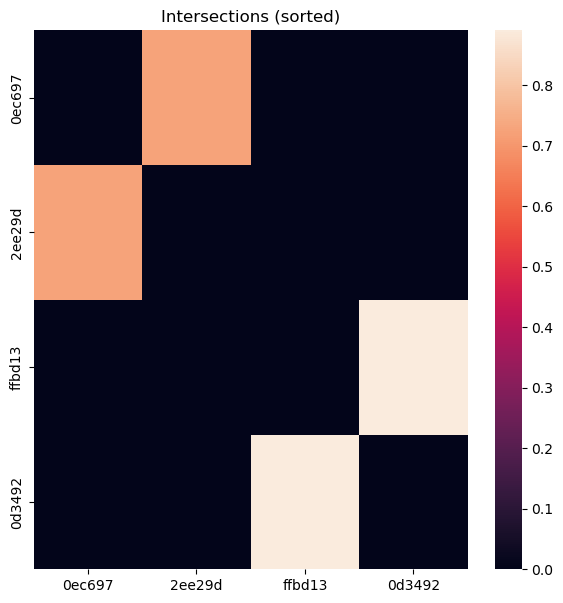

0.7241323517514764
0.8911637931034483


In [44]:
max_rel_intersect = intersect_relative_data.max()
high_corr_potentials = list(max_rel_intersect.loc[max_rel_intersect > 0.5].index)
intersect_relative_high_corr = intersect_relative_data.loc[intersect_relative_data.index.isin(high_corr_potentials)][high_corr_potentials]
plt.figure(figsize = (7, 7))
plt.title("Intersections (sorted)")
sns.heatmap(data = intersect_relative_high_corr)
plt.show()

print(intersect_relative_data.loc["0ec697", "2ee29d"])
print(intersect_relative_data.loc["0d3492", "ffbd13"])

# Check whether the language in each tree (by channel) is uniform

In [47]:
num_languages_by_channel = data.topics.groupby("channel")["language"].nunique()
num_languages_by_channel.loc[num_languages_by_channel > 1]

channel
217993    13
38a3e2     2
4d2d4a     7
5139e9     2
6e90a7     2
8260fc     3
9a51b0     2
9dd9a7     3
bbce73     2
c8450a     2
Name: language, dtype: int64

most of the trees have same language, although some have multiple.

# Check whether the contents in each non-empty topic has same language

In [35]:
import time

merged = data.topics.join(data.correlations, how = "inner")
display(merged)

def create_df(x):
    tdf = pd.DataFrame(index = x["content_ids"].split())
    tdf["topic_id"] = x.name
    tdf["title"] = x["title"]
    tdf["description"] = x["description"]
    tdf["channel"] = x["channel"]
    tdf["category"] = x["category"]
    tdf["level"] = x["level"]
    tdf["language"] = x["language"]
    return tdf
# returns a series of dataframes with apply. list function turns it into a list of dataframes. and then we concat it
ctime = time.time()
merged2 = pd.concat(list(merged.apply(create_df, axis = "columns")))
merged2 = merged2.join(data.contents, how = "inner", rsuffix = "_content")

language_different = merged2.loc[merged2["language"] != merged2["language_content"]]
ctime = time.time() - ctime
display(language_different)
print("time elapsed:", ctime)

,title,description,channel,category,level,language,parent,has_content,content_ids
t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True,c_11a1dc0bfb99
t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
t_0008768bdee6,100 સુધીનો સરવાળો,37 અને 49 જેવી બે-અંકની સંખ્યાઓ ઉમેરતા શીખો.,5223e0,supplemental,4,gu,t_0da7a331d666,True,c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...,...,...,...,...,...,...,...,...,...
t_fff830472691,Scalar Projections,NaN,fef095,source,4,en,t_c75d6acecf78,True,c_61fb63326e5d c_8f224e321c87
t_fff9e5407d13,NA_U06 - El periódico,NaN,71fd51,supplemental,2,es,t_5bd8f6ae9f7d,True,c_026db653a269 c_0fb048a6412c c_20de77522603 c...
t_fffbe1d5d43c,Inscribed shapes problem solving,Use properties of inscribed angles to prove pr...,0c929f,source,4,sw,t_50145b9bab3f,True,c_46f852a49c08 c_6659207b25d5
t_fffe14f1be1e,Lección 7,NaN,6e90a7,aligned,6,es,t_d448c707984d,True,c_cece166bad6a


,topic_id,title,description,channel,category,level,language,title_content,description_content,kind,text,language_content,copyright_holder,license
c_010fdf43f03e,t_b40178fcca38,filterOddElements,NaN,42e8ef,supplemental,7,es,test_filterOddElements.spec.js,NaN,html5,NaN,en,NaN,NaN
c_010fdf43f03e,t_cbc6f37e7833,filterOddElements,NaN,fc9105,supplemental,6,es,test_filterOddElements.spec.js,NaN,html5,NaN,en,NaN,NaN
c_016874dbc462,t_154423db29ed,The Mailman and the Five Packages: Data Packet...,This lesson will explain the process of data t...,6e3ba4,source,3,en,Arabic: The Mailman and the Five Packages: Dat...,This lesson will explain the process of data t...,video,NaN,ar,NaN,NaN
c_016874dbc462,t_50bf9c224dfb,The Mailman and the Five Packages: Data Packet...,This lesson will explain the process of data t...,6e3ba4,source,3,en,Arabic: The Mailman and the Five Packages: Dat...,This lesson will explain the process of data t...,video,NaN,ar,NaN,NaN
c_0178cba405da,t_d4c1e0858e6d,"Taking Walks, Delivering Mail: An Introduction...",This learning video presents an introduction t...,6e3ba4,source,3,en,"English-Spanish Subtitles: Taking Walks, Deliv...",This learning video presents an introduction t...,video,NaN,es,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_fea808d07c32,t_5ae63201e1cb,"Amount of Substance and Its Unit, Mole: Connec...",This two-part lesson examines the concepts of ...,6e3ba4,source,3,en,Mandarin Voice-over: Amount of Substance and I...,This two-part lesson examines the concepts of ...,video,NaN,zh,NaN,NaN
c_feea223848fd,t_bab5d2920003,Prepositions-4,NaN,5139e9,source,7,ar,Countable and Uncountable Nouns: Learn English...,NaN,video,NaN,en,NaN,NaN
c_ff43191fffdf,t_1a662c84efa5,ReferenceError: whatToWear,NaN,42e8ef,supplemental,7,es,boilerplate_whatToWear.js,NaN,html5,NaN,en,NaN,NaN
c_ffd49393f4c4,t_13047d953c48,Objetos simples,NaN,fc9105,supplemental,6,es,boilerplate_simpleObjects.js,NaN,html5,NaN,en,NaN,NaN


time elapsed: 106.15864181518555


In [50]:
language_different.loc[
    (language_different["language_content"] == "en") & (language_different["title_content"].apply(lambda x: not x.endswith(".js")))
]

,topic_id,title,description,channel,category,level,language,title_content,description_content,kind,text,language_content,copyright_holder,license
c_0219af66ef70,t_2f3de0e2997e,WILL vs. GOING TO,The Future in English: WILL vs. GOING TO,5139e9,source,7,ar,The Future in English: WILL vs. GOING TO,NaN,video,NaN,en,NaN,NaN
c_03d356a7cdfd,t_b973daf20c04,Phrases thank God thank goodness thanks to you,NaN,5139e9,source,7,ar,"Learn English phrases: thank God, thank goodne...",NaN,video,NaN,en,NaN,NaN
c_045a5a8a37cf,t_98dcf67b1315,SAFE,English Vocabulary Word of the Day: SAFE,5139e9,source,7,ar,English Vocabulary Word of the Day: SAFE,NaN,video,NaN,en,NaN,NaN
c_049ab7331d7f,t_a66e71ad1899,प्रश्न पूछना: हम बीमार क्यों पड़ते हैं,NaN,4d2d4a,source,4,hi,CBSE Class 9 Science Introductory Video: Why D...,NaN,video,NaN,en,NaN,NaN
c_05d9a3427a50,t_63dcb0613439,food1,Lunch,5139e9,source,7,ar,Breakfast Song,NaN,video,NaN,en,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_f6d3b98bf5ac,t_81e4b03a4c49,Questions 2,Subject and Object Questions in English,5139e9,source,7,ar,Subject and Object Questions in English,NaN,video,NaN,en,NaN,NaN
c_f865936626bb,t_1ef78f17ae88,R9.1.2 build vocabulary by visiting a website,NaN,5139e9,source,8,ar,Lesson 10,NaN,video,NaN,en,NaN,NaN
c_f8a9b2c2d48f,t_b72c91542389,Adverbs,NaN,5139e9,source,7,ar,Intensifying Adverbs: English Vocabulary Lesson,NaN,video,NaN,en,NaN,NaN
c_fa8fa031f21e,t_cc03f465fb6f,the verb to like comparison prices clothing co...,Lesson 14,5139e9,source,7,ar,Lesson 14,NaN,video,NaN,en,NaN,NaN


In [49]:
language_different["language_content"] == "en"

c_010fdf43f03e     True
c_010fdf43f03e     True
c_016874dbc462    False
c_016874dbc462    False
c_0178cba405da    False
                  ...  
c_fea808d07c32    False
c_feea223848fd     True
c_ff43191fffdf     True
c_ffd49393f4c4     True
c_ffd49393f4c4     True
Name: language_content, Length: 1086, dtype: bool

In [46]:
language_different["title_content"].apply(lambda x: not x.endswith(".js"))

c_010fdf43f03e    False
c_010fdf43f03e    False
c_016874dbc462     True
c_016874dbc462     True
c_0178cba405da     True
                  ...  
c_fea808d07c32     True
c_feea223848fd     True
c_ff43191fffdf    False
c_ffd49393f4c4    False
c_ffd49393f4c4    False
Name: title_content, Length: 1086, dtype: bool